# Part A - Distance Based (k-means)

In [1]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

## Load and scatter dataset

In [2]:
trainset = np.loadtxt('Aggregation.txt')
trainset

array([[15.55, 28.65,  2.  ],
       [14.9 , 27.55,  2.  ],
       [14.45, 28.35,  2.  ],
       ...,
       [ 8.5 ,  3.25,  5.  ],
       [ 8.1 ,  3.55,  5.  ],
       [ 8.15,  4.  ,  5.  ]])

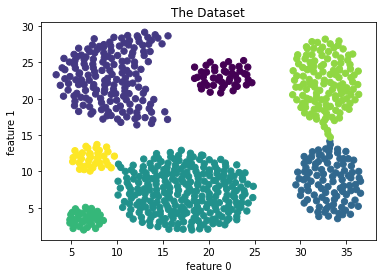

In [13]:
x = [trainset[i][0] for i in range(len(trainset))]
y = [trainset[i][1] for i in range(len(trainset))]
Cluster = [trainset[i][2] for i in range(len(trainset))]

fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(x, y, c=Cluster, s=40)
plt.title("The Dataset")
plt.xlabel("feature 0")
plt.ylabel("feature 1")

plt.show()

## Implementation of k-means

In [16]:
def k_means(k, trainset):

    # random initial centroids and initializing clusters
    centroids = [list(np.random.uniform(0,35,2)) for i in range(k)] 
#     print('Initial centroids:', centroids)
    
    for i in range(10):
        # print('-------', i, '-------')
        clusters = []
        for centroid in centroids:
            clusters.append([centroid])

        # assign each example to nearest cluster
        for data in trainset:
            distances = []
            for centroid in centroids:
                distances.append(math.dist([data[0], data[1]], centroid)) 
            min_dist_cluster = np.array(distances).argmin()
            clusters[min_dist_cluster].append([data[0], data[1]])
#         print('Clusters:', clusters)
        
        # calculate new centroids
        centroids = []
        for c in clusters:
            mean_val = np.sum(c, axis=0)/len(c)
            centroids.append(mean_val)
#         print('New centroids:', centroids)
        
    return clusters, centroids

In [17]:
def cost(clusters, centroids, k):
    cost_value = 0
    for i in range(k):
        for c in clusters[i]:
            cost_value += math.dist(c, centroids[i])
    return cost_value

## Run k-means for 10 different value of k

Text(0, 0.5, 'cost function')

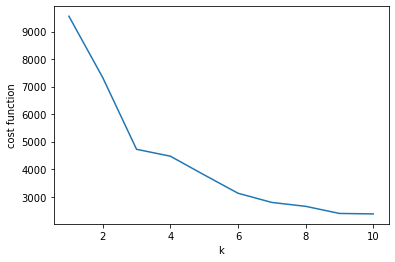

In [18]:
Total_Clusters = []
Total_Centroids = []
k_values = [i for i in range(1, 11)]
j_values = []

for k in k_values:
    clusters, centroids = k_means(k, trainset)
    j = cost(clusters, centroids, k)
    j_values.append(j)
    Total_Clusters.append(clusters)
    Total_Centroids.append(centroids)
    
    
# plot cost function by changing k values
plt.plot(k_values, j_values)
plt.xlabel('k')
plt.ylabel('cost function')

## Plot clusters after using k-means for 5 best values of k

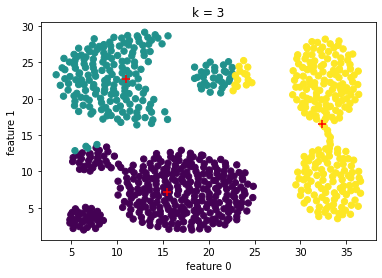

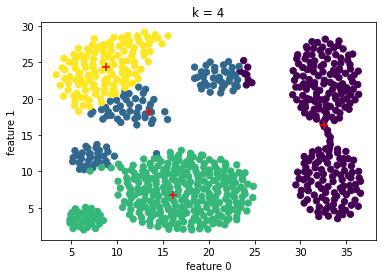

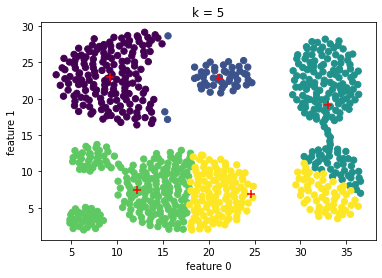

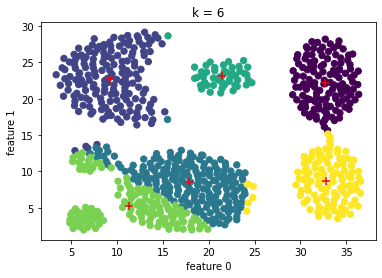

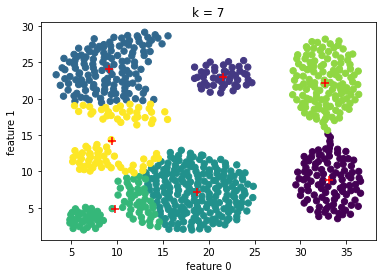

In [19]:
# 5 best values of k
k_best = [3, 4, 5, 6, 7]

for k in k_best:
    
    clusters = Total_Clusters[k-1]
    centroids = Total_Centroids[k-1]
    
    X = []
    Y = []
    Clusters = []
    cluster_num = 0
    
    for c in clusters:
        x = [c[i][0] for i in range(len(c))]
        y = [c[i][1] for i in range(len(c))]
        cluster = [cluster_num for i in range(len(c))]
        X.extend(x)
        Y.extend(y)
        Clusters.extend(cluster)
        cluster_num += 1
        
    fig = plt.figure()
    ax = fig.add_subplot(111)

    scatter = ax.scatter(X, Y, c=Clusters, s=40)
    for i, j in centroids:
        ax.scatter(i, j, s=50, c='red', marker='+')
    
    plt.title("k = "+str(k))
    plt.xlabel("feature 0")
    plt.ylabel("feature 1")
    
    plt.show()